# Dimensionality reduction

## PCA

In [1]:
%matplotlib inline
import numpy as np
#np.set_printoptions(2,suppress=True)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


#from warnings import filter_warnings
#filter_warnings('ignore')


/home/amandae/.local/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/home/amandae/.local/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/home/amandae/.local/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/home/amandae/.local/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/home/amandae/.local/lib/python2.7/site-packages/scipy/interpolate/_bsplines.py:10: RuntimeWarning: numpy.dtype size changed, may indic

/home/amandae/anaconda3/envs/nh18py2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:28: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._online_lda import (mean_change, _dirichlet_expectation_1d,


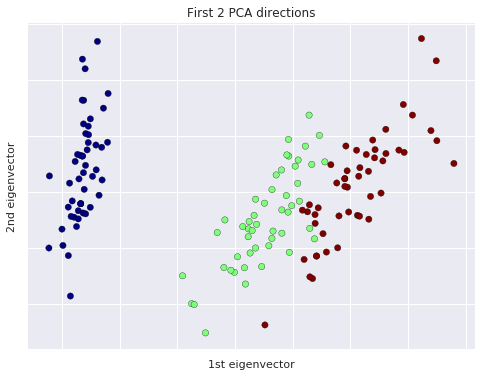

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_reduced = PCA().fit_transform(iris.data) #PCA(n_components=2)

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(1,1,1)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.jet, edgecolor='k', s=40)
ax.set_title("First 2 PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_xticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.set_yticklabels([])


plt.show()

## Python Data Science Handbook (Jake VDP)
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

#### A note on whitening:
* When True (False by default) the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
* Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.

array([0.97634101, 0.02365899])

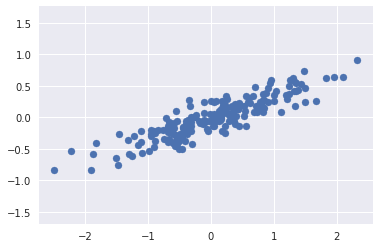

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

pca = PCA(n_components = 2, whiten=True)
# whiten: When True, components_ vectors are multiplied by the square root of 
# n_samples and then divided by the singular values to ensure 
# uncorrelated outputs with unit component-wise variances.
pca.fit(X)
pca.components_
pca.explained_variance_ratio_

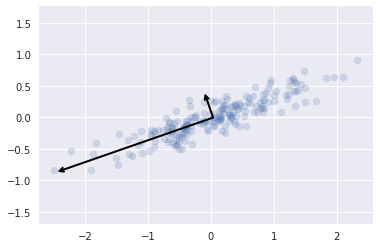

In [4]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

* The vectors represent the *principal axes* of the data
* The length of the vector indicates the importance of that vector in describing the distribution of the data
    * It is a measure of the *variance* of the data when projected onto that axis
* The projection of each data point onto the principal axes are the <b>principal components</b>
* The transformation from data axes to principal axes is an <b>affine transformation</b>: consists of translation, rotation, uniform scaling

## PCA Rotation

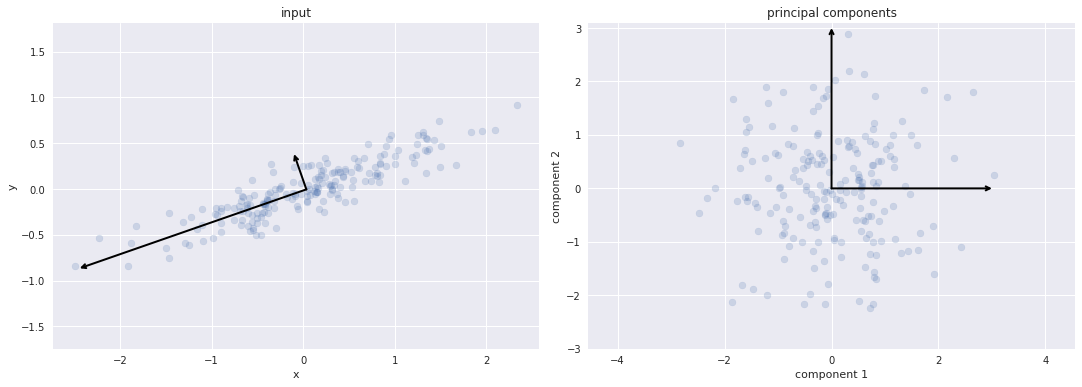

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

plt.show()

## PCA for dimenstionality reduction

* zero out on 1+ of smallest PCs, resulting in lower-dimensional projection of data that preserves maximal data variance 
* to understand how the dimensionality reduction affected the data, we can perfrom the *inverse transform* of this reduced data
    * the information along the least important principal axes is removed, leaving only the component(s) of the data with the highest variance
    * the fraction of variance that is removed (proportional to the spread of points about the line formed in the figure below) is a rough measure of how much "information" is discarded
    * in this case, the reduced-dimension data is "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points is mostly preserved

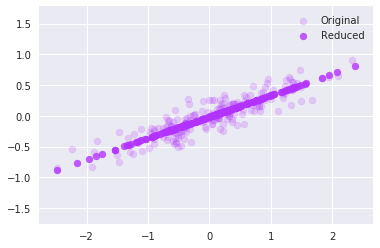

In [6]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], color=[.7,.2,1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], color=[.7,.2,1],alpha=0.8)
plt.axis('equal');
plt.legend(['Original', 'Reduced'])
plt.show()

## PCA for data visualization: handwritten digits

* project each data point along the directions with largest variance
* found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in 2 dimensions in an unsupervised manner

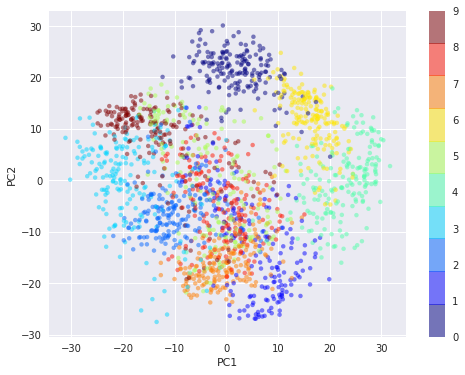

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
pca = PCA(2) # project data from 64 to 2 dimensions
pca.fit(digits.data) # could also just do pca.fit_transform
projected = pca.transform(digits.data)

projected2 = pca.fit_transform(digits.data)

fig = plt.figure(figsize=(8,6))

plt.scatter(projected2[:,0], projected2[:,1],s=20,c=digits.target, edgecolor='none',
           alpha=0.5, cmap=plt.cm.get_cmap('jet',10))
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.colorbar(); plt.show()

## What do the components mean?

* the meaning of the reduced dimensions can be understood in terms o fcombos of basis vectors 
* e.g. each image in the handwritten digits is defined by a collection of 64 pixel values in vector x
* pixel basis: to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

image(x) = x1 * pixel1 + x2 * pixel2 ... + x64 * pixel64

* one way to imagine reducing the dimension of the data is to zero out all but a few of these basis vectors 
* e.g. use only the first eight pixels --> get an 8D projection of the data, but it's not very reflective of the whole image- we've thrown out nealry 90% of the pixels

* BUT the pixel-wise representation isn't the only choice of basis: can use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like:

image(x) = mean + x1 * basis1 + x2 * basis2 ... + x64 * basis64

* PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset
* the PCs, which act as the low-D rep of our data, are simply the <b>coefficients</b> that multiply each of the elements in this series

* the amount of each pixel in each component is the corollary of the orientation of the vector in our 2D example
    * this is the sense in which PCA provides a low-D rep of the data: it discovers a set of basis functions that are more *efficient* than the native pixel-basis of the input data

## Choosing the # of components

* look at <b>cumulative explained variance ratio</b> as a function of # of components 

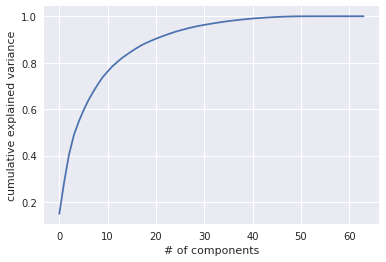

In [8]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('cumulative explained variance')
plt.show()

## PCA as noise filtering 

* based on idea that any components with variance much larger than the effect of the noise should be relatively unaffected by the noise
* reconstruct data using the largest subset of PCs, you should be preferentially keeping hte signal and throwing out the noise 
* helps with training classifiers


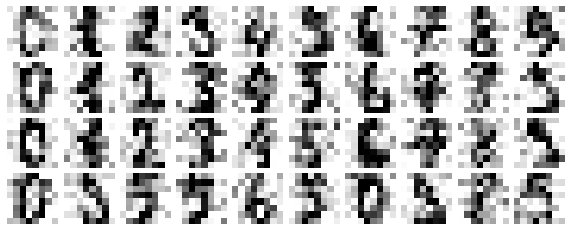

In [9]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

# add noise:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

N components: 12


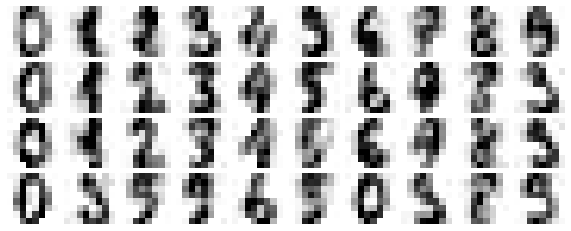

In [10]:
pca = PCA(0.50).fit(noisy) # can specifiy % variance to preserve instead of # PCs
print('N components: ' + str(pca.n_components_))

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Eigenfaces :) 

* since it's a large dataset, use `RandomizedPCA`: it contains a randomized method to approximate the first N PCs much more quickly 

* NOTE: PCs technically known as "eigenvectors"
* Eigenfaces give insight into how the images vary: the first few eigenfaces are associated with the angle of lighting on the face, and later principal vectors pick out different facial features
* the first 150 PCs account for ~90% of variance: can recover the most essential characteristics of the data

In [11]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

/home/amandae/anaconda3/envs/nh18py2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


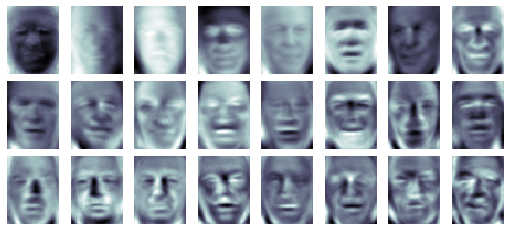

In [12]:
from sklearn.decomposition import RandomizedPCA
pca= RandomizedPCA(150)
pca.fit(faces.data)

fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

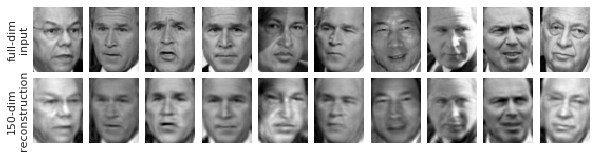

In [13]:
# reduce 3000 dimensions to 150!
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

## Other notes

* Weaknesses: PCA is affected by outliers, so many robust PCA variants have been developed, many of which act to iteratively discard data points that are poorly described by the initial components 
* `RandomizedPCA`: uses non-deterministic method to quickly approximate the first few PCs in very high-D data
* `SparsePCA`: introduces regularization term that serves to enforce sparsity of the components 

## PCA by hand 

In [14]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

# split data table into data X and class labels y

X = df.ix[:,0:4].values
y = df.ix[:,4].values

/home/amandae/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/home/amandae/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


In [16]:
# 1) Standardize data

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
tmp = np.std(X_std,0)
np.shape(tmp)
tmp[2]
StandardScaler?

In [ ]:
# 2) covariance matrix
# dimension d x d (d = # of features)

mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

# faster: np.cov(X_std.T)

In [ ]:
# 3) eigendecomposition or SVD

# each column is an eigenvector

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
u, s, v = np.linalg.svd(cov_mat)

print(eig_vals.shape)
print(eig_vecs.shape)
print(u.shape)
print(s.shape)
print(v.shape)

All of these approaches yield the same eigenvectors and eigenvalue pairs:

* Eigendecomposition of the covariance matrix after standardizing the data.
* Eigendecomposition of the correlation matrix.
* Eigendecomposition of the correlation matrix after standardizing the data.



* Eigenvectors only define the *directions* of the new axis, since they all have the same unit length 1:

In [ ]:
for ev in range(len(eig_vecs)):
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(eig_vecs[:,ev]))
    # np.sum(np.square(ev))
print('Eigevectors all have unit length 1!')

In [ ]:
# 4) Sort pairs from highest to lowest

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort()
eig_pairs.reverse()

In [ ]:
# 5) Explained variance

tot  = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(['PC %s' %i for i in range(1,5)], var_exp)
plt.plot(['PC %s' %i for i in range(1,5)], cum_var_exp, color='r')
plt.scatter(['PC %s' %i for i in range(1,5)], cum_var_exp, color='r')
plt.title('Explained variance')
plt.ylabel('Explained variance (%)')
plt.show()

In [ ]:
# 6) Projection matrix 
# matrix of concatenated top k eigenvectors
# projection matrix = W = d x k

W = np.hstack((eig_pairs[0][1].reshape(4,1),
              eig_pairs[1][1].reshape(4,1)))
              
print(W)

In [ ]:
# 7) Transform data

Y = X_std.dot(W)  # Y = X * W


fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.scatter(Y[:, 0], Y[:, 1], c=iris.target, cmap=plt.cm.jet, edgecolor='k', s=50)
ax.set_title("First 2 PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_xticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.set_yticklabels([])

plt.show()

## SVD

https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254

* A = U * S * V.T
* A = m * n 
* u = m * n orthogonal matrix
* s = n * n diagonal matrix (if n < m)
* v = n * n orthogonal matrix

In [ ]:
A = np.random.randn(4,3)
U, S, V = np.linalg.svd(A) # V here is V.T such that A = U*S*V
U = U[:,:-1] # where does the extra column come from?!?!?!?!?
ss = np.diag(S)
aa = np.dot(np.dot(U,ss),V)
np.testing.assert_array_almost_equal(A, aa)

In [ ]:
np.testing.assert_array_almost_equal?